In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
cal_df = pd.read_csv('./archive/calendar.csv')
list_df = pd.read_csv('./archive/listings.csv')
review_df = pd.read_csv('./archive/reviews.csv')

## Business Understanding
     1) Which features influence the property price?
     2) Is the superhost acting well compared with other people?
     3) Can you predict the housing price?

## Data Understanding

In [2]:
# loop check each dataset overall shape
for item in [cal_df, list_df,review_df]:
    print (item.shape)

(1308890, 4)
(3585, 95)
(68275, 6)


In [3]:
# loop check each dataset overall values
for item in [cal_df, list_df,review_df]:
    display(item.head(5))

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
# Check which coloumns have null missing values
for item in [cal_df, list_df,review_df]:
    print(set(item.columns[item.isnull().mean()==0]))
print("----------")
# Check which columns have most missing values
for item in [cal_df, list_df,review_df]:
    print(set(item.columns[item.isnull().mean() > 0.5]))

{'date', 'listing_id', 'available'}
{'host_is_superhost', 'description', 'state', 'host_url', 'room_type', 'number_of_reviews', 'instant_bookable', 'calculated_host_listings_count', 'neighbourhood_cleansed', 'host_name', 'longitude', 'scrape_id', 'availability_30', 'last_scraped', 'availability_90', 'availability_365', 'latitude', 'accommodates', 'host_verifications', 'host_total_listings_count', 'picture_url', 'country_code', 'listing_url', 'experiences_offered', 'extra_people', 'host_picture_url', 'amenities', 'country', 'host_listings_count', 'id', 'bed_type', 'require_guest_profile_picture', 'cancellation_policy', 'smart_location', 'price', 'minimum_nights', 'host_has_profile_pic', 'requires_license', 'calendar_updated', 'street', 'host_id', 'maximum_nights', 'require_guest_phone_verification', 'name', 'availability_60', 'host_identity_verified', 'is_location_exact', 'host_since', 'calendar_last_scraped', 'guests_included', 'host_thumbnail_url'}
{'date', 'id', 'listing_id', 'review

In [5]:
for item in [cal_df, list_df,review_df]:
    item.info()
    print('------ ***** --------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
------ ***** --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary   

## Data Preparation

In [6]:
# Drop NaN existed all for columns
print(list_df.shape)
list_df.dropna(axis=1,how='all', inplace=True)
print(list_df.shape)

(3585, 95)
(3585, 91)


In [7]:
# dropping nan values for bathrooms, bedrooms and beds because of its importantance with house itself
list_df.dropna(axis = 0, subset = ["bathrooms", "bedrooms", "beds"], inplace = True)
print(list_df.shape)

(3557, 91)


In [8]:
# convert the string values for price to integer so as to make further calcualtion
for x in ["cleaning_fee", "security_deposit", "price"]:
    list_df[x] = list_df[x].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')
    list_df[x] = list_df[x].astype(float)
    list_df[x].fillna(list_df[x].median(), inplace = True)


In [9]:
list_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3557 non-null   int64  
 1   listing_url                       3557 non-null   object 
 2   scrape_id                         3557 non-null   int64  
 3   last_scraped                      3557 non-null   object 
 4   name                              3557 non-null   object 
 5   summary                           3431 non-null   object 
 6   space                             2503 non-null   object 
 7   description                       3557 non-null   object 
 8   experiences_offered               3557 non-null   object 
 9   neighborhood_overview             2162 non-null   object 
 10  notes                             1604 non-null   object 
 11  transit                           2287 non-null   object 
 12  access

In [10]:
# select only the quantitive coloumns
price_dataset = list_df.select_dtypes(include=['int64', 'float64'])
price_dataset.head(5)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,12147973,20160906204935,31303940,1,1,42.282619,-71.133068,4,1.5,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,3075044,20160906204935,2572247,1,1,42.286241,-71.134374,2,1.0,1.0,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
2,6976,20160906204935,16701,1,1,42.292438,-71.135765,2,1.0,1.0,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,1,0.47
3,1436513,20160906204935,6031442,1,1,42.281106,-71.121021,4,1.0,1.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00
4,7651065,20160906204935,15396970,1,1,42.284512,-71.136258,2,1.5,1.0,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.25


In [11]:
# fill nan values with their columns mean values
for x in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]:
    price_dataset[x].fillna(price_dataset[x].mean(), inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
price_dataset.head(5)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,12147973,20160906204935,31303940,1,1,42.282619,-71.133068,4,1.5,2.0,...,0,91.954562,9.435401,9.261202,9.648195,9.652095,9.416636,9.175055,1,1.975508
1,3075044,20160906204935,2572247,1,1,42.286241,-71.134374,2,1.0,1.0,...,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,1.300000
2,6976,20160906204935,16701,1,1,42.292438,-71.135765,2,1.0,1.0,...,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1,0.470000
3,1436513,20160906204935,6031442,1,1,42.281106,-71.121021,4,1.0,1.0,...,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1.000000
4,7651065,20160906204935,15396970,1,1,42.284512,-71.136258,2,1.5,1.0,...,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,2.250000


In [13]:
cat_df = list_df.select_dtypes(include=['object'])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   listing_url                       3557 non-null   object
 1   last_scraped                      3557 non-null   object
 2   name                              3557 non-null   object
 3   summary                           3431 non-null   object
 4   space                             2503 non-null   object
 5   description                       3557 non-null   object
 6   experiences_offered               3557 non-null   object
 7   neighborhood_overview             2162 non-null   object
 8   notes                             1604 non-null   object
 9   transit                           2287 non-null   object
 10  access                            2089 non-null   object
 11  interaction                       2024 non-null   object
 12  house_rules         

In [14]:
cat_df.head(5)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
2,https://www.airbnb.com/rooms/6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
3,https://www.airbnb.com/rooms/1436513,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
4,https://www.airbnb.com/rooms/7651065,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f


In [15]:
#add categorical columns to price dataset
price_dataset[['superhost', 'room_type', 'neighbourhood_cleansed', 'cancellation_policy', 'property_type', 'host_response_time']] = list_df[['host_is_superhost', 
                                                           'room_type',  'neighbourhood_cleansed',
                                                           'cancellation_policy', 'property_type', 'host_response_time']]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
price_dataset.drop(labels = ["square_feet"], axis = 1, inplace = True)
price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3557 non-null   int64  
 1   scrape_id                       3557 non-null   int64  
 2   host_id                         3557 non-null   int64  
 3   host_listings_count             3557 non-null   int64  
 4   host_total_listings_count       3557 non-null   int64  
 5   latitude                        3557 non-null   float64
 6   longitude                       3557 non-null   float64
 7   accommodates                    3557 non-null   int64  
 8   bathrooms                       3557 non-null   float64
 9   bedrooms                        3557 non-null   float64
 10  beds                            3557 non-null   float64
 11  price                           3557 non-null   float64
 12  security_deposit                35

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
# Convert type-realted values to numberical values
cleanup_nums = {"superhost":     {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}

In [18]:
price_dataset_copy = price_dataset
price_dataset_copy = price_dataset_copy.replace(cleanup_nums)
dummuy_price_dataset_copy = pd.get_dummies(price_dataset_copy)

In [19]:
dummuy_price_dataset_copy.head(5)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,12147973,20160906204935,31303940,1,1,42.282619,-71.133068,4,1.5,2.0,...,0,1,0,0,0,0,0,0,0,0
1,3075044,20160906204935,2572247,1,1,42.286241,-71.134374,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,6976,20160906204935,16701,1,1,42.292438,-71.135765,2,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,1436513,20160906204935,6031442,1,1,42.281106,-71.121021,4,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0
4,7651065,20160906204935,15396970,1,1,42.284512,-71.136258,2,1.5,1.0,...,0,1,0,0,0,0,0,0,0,1


In [20]:
cat_price_dataset_copy = price_dataset_copy.select_dtypes(include=['object'])
cat_price_dataset_copy

,neighbourhood_cleansed,property_type,host_response_time
0,Roslindale,House,NaN
1,Roslindale,Apartment,within an hour
2,Roslindale,Apartment,within a few hours
3,Roslindale,House,within a few hours
4,Roslindale,House,within an hour
...,...,...,...
3580,Charlestown,Apartment,within an hour
3581,Allston,Apartment,a few days or more
3582,Charlestown,Apartment,within a day
3583,Charlestown,Apartment,within an hour


## Data Modeling

In [21]:
#import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

y = dummuy_price_dataset_copy.price
x = dummuy_price_dataset_copy[[       'room_type', 'cancellation_policy', 'neighbourhood_cleansed_Allston',
       'neighbourhood_cleansed_Back Bay', 'neighbourhood_cleansed_Bay Village',
       'neighbourhood_cleansed_Beacon Hill', 'neighbourhood_cleansed_Brighton',
       'neighbourhood_cleansed_Charlestown',
       'neighbourhood_cleansed_Chinatown', 'neighbourhood_cleansed_Dorchester',
       'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_East Boston',
       'neighbourhood_cleansed_Fenway', 'neighbourhood_cleansed_Hyde Park',
       'neighbourhood_cleansed_Jamaica Plain',
       'neighbourhood_cleansed_Leather District',
       'neighbourhood_cleansed_Longwood Medical Area',
       'neighbourhood_cleansed_Mattapan',
       'neighbourhood_cleansed_Mission Hill',
       'neighbourhood_cleansed_North End', 'neighbourhood_cleansed_Roslindale',
       'neighbourhood_cleansed_Roxbury', 'neighbourhood_cleansed_South Boston',
       'neighbourhood_cleansed_South Boston Waterfront',
       'neighbourhood_cleansed_South End', 'neighbourhood_cleansed_West End',
       'neighbourhood_cleansed_West Roxbury', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Entire Floor',
       'property_type_Guesthouse', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Townhouse', 'property_type_Villa']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
 #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.2328414965496881.  The rsquared on the test data was 0.2534365867985363.


## Results and Evaluation

### Which features influence the property price?

In [22]:
price_dataset.groupby(['room_type']).count()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,superhost,neighbourhood_cleansed,cancellation_policy,property_type,host_response_time
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,...,2113,2113,2113,2113,2113,2113,2113,2113,2111,1856
Private room,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,...,1365,1365,1365,1365,1365,1365,1365,1365,1364,1164
Shared room,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,68


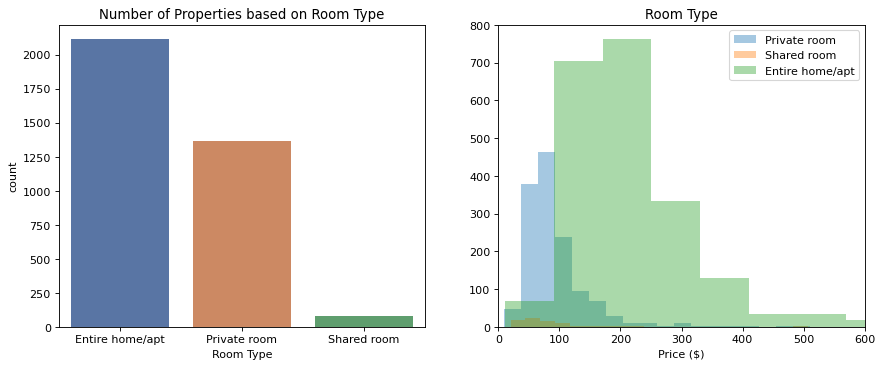

In [23]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=80)
sns.countplot(x = 'room_type', data = price_dataset, 
              palette = 'deep', ax=axs[0]).set_title("Number of Properties based on Room Type")
axs[0].set_xlabel('Room Type')


#Visualize and understand the distriution of pricing among the each room type.
sns.distplot(price_dataset[price_dataset.room_type == 'Private room']['price'],
             kde=False, ax=axs[1], label='Private room')
sns.distplot(price_dataset[price_dataset.room_type == 'Shared room']['price'],
             kde=False, ax=axs[1], label='Shared room')
sns.distplot(price_dataset[price_dataset.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[1], label='Entire home/apt')

axs[1].set_xlim(0, 600)
axs[1].set_title('Room Type')
axs[1].set_xlabel('Price ($)')
axs[1].legend()


### 1. The larget portation of the room type in boston is Entire home/apt and the smallerst portation of the room type is the share room.
### 2. The price of entire home/apt rooms domoniates the market and has a max distribution between 200 -300 dollars

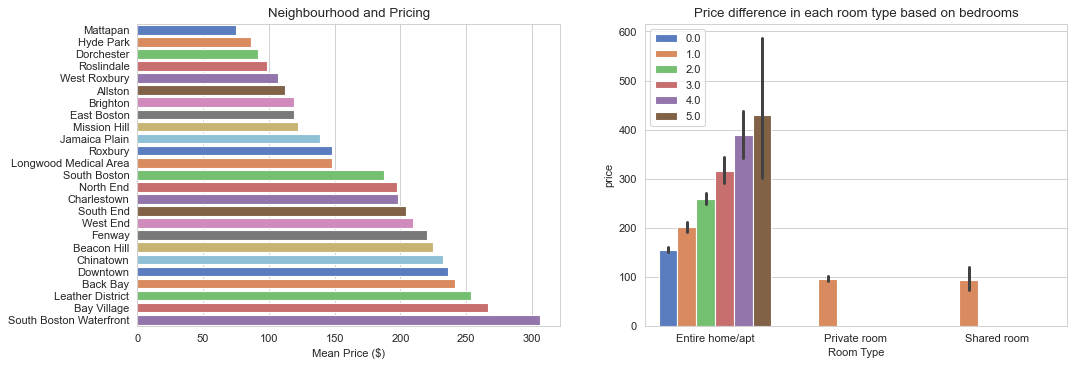

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=80)
sns.set_style(style="whitegrid")
sns.color_palette("husl", 9)
# Neighbourhoods
neighbourhoods = price_dataset.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='muted',
    ax=axs[0]
)
axs[0].set_title('Neighbourhood and Pricing')
axs[0].set_xlabel('Mean Price ($)')
axs[0].set_ylabel('')

sns.barplot(x="room_type", y="price", hue= 'bedrooms', data= price_dataset, 
            palette= 'muted', ax=axs[1])

axs[1].set_title('Price difference in each room type based on bedrooms')
axs[1].set_xlabel('Room Type')
axs[1].legend()

### 1. It is obvious to conclude that the proterty price is positively realted to neighbourhood.
### 2. It is obvious to conclude that for the same room type, the price will increase as adding more bedrooms

Text(0, 0.5, '')

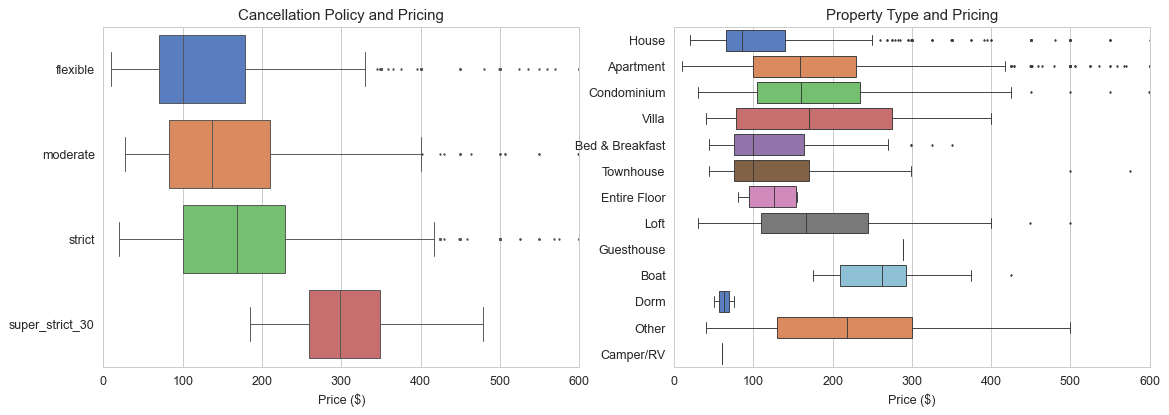

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=90)
sns.set_style(style="whitegrid")

# Cancellation Policy
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75,
            data=price_dataset, palette='muted', ax=axs[0],
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
axs[0].set_xlim(0, 600)
axs[0].set_title('Cancellation Policy and Pricing')
axs[0].set_xlabel('Price ($)')
axs[0].set_ylabel('')
#calendar
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75,
            data=price_dataset, palette='muted', ax=axs[ 1])
axs[ 1].set_xlim(0, 600)
axs[ 1].set_title('Property Type and Pricing')
axs[ 1].set_xlabel('Price ($)')
axs[ 1].set_ylabel('')

### 1. It is obvious to conclude that the proterty price is positively realted to cancellation Policy.
### 2. It is obvious to conclude that the price is postive related to different types that the property has.

## Is the superhost acting well compared with other people?

Text(0.5, 1.0, 'Superhost Number')

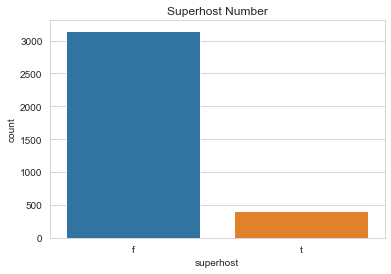

In [28]:
sns.countplot(x="superhost", data=price_dataset).set_title("Superhost Number")

### The superhost is way less than normal host

In [29]:
response_time = price_dataset.groupby(['superhost', 'host_response_time']).size()
response_time

superhost  host_response_time
f          a few days or more      43
           within a day           429
           within a few hours    1063
           within an hour        1151
t          within a day            35
           within a few hours     142
           within an hour         225
dtype: int64

In [30]:
# Need to normlalize to mean values
normalise_mean = response_time / price_dataset.groupby(['superhost']).size()
normalise_mean = normalise_mean.reset_index(name='counts')
normalise_mean

,superhost,host_response_time,counts
0,f,a few days or more,0.013651
1,f,within a day,0.136190
2,f,within a few hours,0.337460
3,f,within an hour,0.365397
4,t,within a day,0.085995
5,t,within a few hours,0.348894
6,t,within an hour,0.552826


In [31]:
px.bar(normalise_mean
, x="superhost", y="counts", color="host_response_time",
            hover_data=['host_response_time'], barmode = 'stack', width=650, height=450,
      title="Average response time superhost vs non-superhost")

### It is clearly to obvious to conculde that the superhost has a large propotion for responding within an hour

## Price Prediction

Text(0, 0.5, 'Predictions_LinearRegression(normalize=True)')

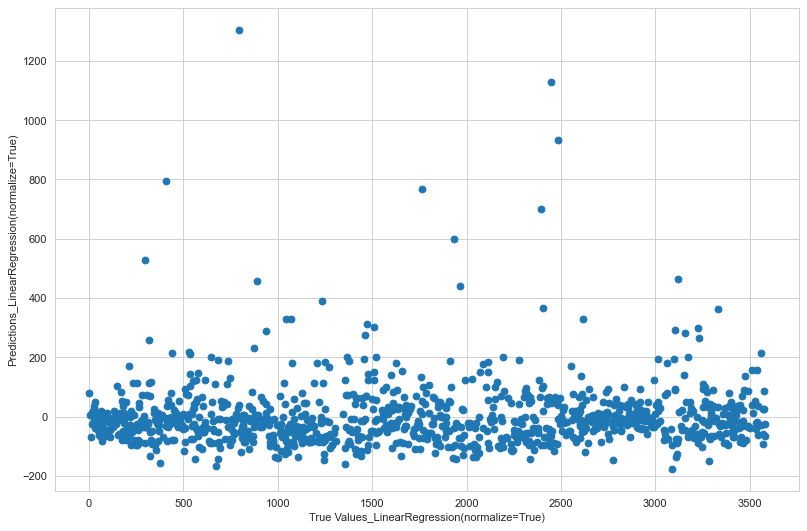

In [32]:
fig = plt.figure(figsize=(12, 8), dpi=80)
ax1 = fig.add_subplot(111)
lines = plt.plot(y_test - y_test_preds,marker='o',linestyle='')
ax1.set_xlabel('True Values_{}'.format(lm_model))
ax1.set_ylabel('Predictions_{}'.format(lm_model))


### The R square result shows that both the train set and the test set have the similar results which validates the model